Работать будем с датасетом ["Credit Score Classification"](https://www.kaggle.com/datasets/parisrohan/credit-score-classification/)

Импорт необходимых библотек:

In [601]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## EDA

Теперь посмотрим на данные и произведём первичную обработку.

In [602]:
data = pd.read_csv('data/train.csv', low_memory=False)

data.shape

(100000, 28)

In [603]:
data.sample(10).T

,12591,34340,74053,5072,40202,38633,36685,847,7814,74508
ID,0x5fc5,0xdf36,0x1c7e7,0x33ba,0x10190,0xf85f,0xecf3,0x1af5,0x43c8,0x1ca92
Customer_ID,CUS_0x8ec,CUS_0x4068,CUS_0x4ac2,CUS_0x660d,CUS_0x9974,CUS_0x1e06,CUS_0x9648,CUS_0x7a0f,CUS_0xb1a0,CUS_0x1041
Month,August,May,June,January,March,February,June,August,July,May
Name,Zawadzkia,Ognibenep,Gahagand,Guernigou Danielr,Poornima Guptai,Deepaa,Douglasf,NaN,NaN,Jonathan Stempela
Age,38,20,43,34,35,49,33,32,17,15
SSN,015-99-4651,096-81-0180,142-75-5225,162-98-1418,112-88-4961,318-14-7292,185-10-0638,838-98-6353,249-90-4145,675-80-2033
Occupation,Scientist,Entrepreneur,Developer,Teacher,Manager,Mechanic,Doctor,Architect,Lawyer,Teacher
Annual_Income,76223.58,102137.1,10100.48,34514.51,36130.89,29605.9,136435.2,38364.82,24188807.0,8978.11
Monthly_Inhand_Salary,5640.117744,8795.425,NaN,3067.209167,3192.9075,NaN,11574.6,2904.068333,1067.655833,894.175833
Num_Bank_Accounts,5,5,9,4,5,8,4,9,8,8


In [604]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [605]:
def uni_zero_null_stats(df):
    df_T = df.T
    df_size = df.shape[0]
    df_info = pd.DataFrame()
    df_info['num_uni'] = df_T.stack().groupby(level=0).nunique()
    df_info['%_uni'] = round(df_info['num_uni']/df_size*100, 2)
    df_info['num_zero'] = (df_T == 0).astype(int).sum(axis=1)
    df_info['%_zero'] = round(df_info['num_zero']/df_size*100, 2)
    df_info['num_null'] = df_T.isnull().sum(axis=1)
    df_info['%_null'] = round(df_info['num_null']/df_size*100, 2)
    df_info.sort_values(by = "%_null", ascending = True)
    return df_info

uni_zero_null_stats(data)

,num_uni,%_uni,num_zero,%_zero,num_null,%_null
Age,1788,1.79,0,0.00,0,0.00
Amount_invested_monthly,91049,91.05,0,0.00,4479,4.48
Annual_Income,18940,18.94,0,0.00,0,0.00
Changed_Credit_Limit,4384,4.38,0,0.00,0,0.00
Credit_History_Age,404,0.40,0,0.00,9030,9.03
Credit_Mix,4,0.00,0,0.00,0,0.00
Credit_Score,3,0.00,0,0.00,0,0.00
Credit_Utilization_Ratio,100000,100.00,0,0.00,0,0.00
Customer_ID,12500,12.50,0,0.00,0,0.00
Delay_from_due_date,73,0.07,1195,1.20,0,0.00


In [606]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000,100000,0x1602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,100000,12500,CUS_0xd40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,90015,10139,Langep,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000,1788,38,2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSN,100000,12501,#F%$D@*&8,5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,100000,16,_______,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000,18940,36585.12,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,84998.0,NaN,NaN,NaN,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,17.09128,117.404834,-1.0,3.0,6.0,7.0,1798.0


Как можно заметить, датасет не совсем чистый, много где есть как и пропущенные значения, так и откровенные выбросы. При этом есть очевидно лишние колонки, как `SSN`, например. А `Credit_History_Age` хочется привести к численному виду.

Приступим к обработке датасета, нужно привести его к "чистому" виду. Практически каждую колонку придётся отлаживать вручную, универсального способа для всех тут просто нет. Объекты с пропущенными значениями придётся выкинуть, с таким обилием признаков "подгадать" что там должно было быть, не представляется возможным.

In [607]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53049 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        53049 non-null  object 
 1   Customer_ID               53049 non-null  object 
 2   Month                     53049 non-null  object 
 3   Name                      53049 non-null  object 
 4   Age                       53049 non-null  object 
 5   SSN                       53049 non-null  object 
 6   Occupation                53049 non-null  object 
 7   Annual_Income             53049 non-null  object 
 8   Monthly_Inhand_Salary     53049 non-null  float64
 9   Num_Bank_Accounts         53049 non-null  int64  
 10  Num_Credit_Card           53049 non-null  int64  
 11  Interest_Rate             53049 non-null  int64  
 12  Num_of_Loan               53049 non-null  object 
 13  Type_of_Loan              53049 non-null  object 
 14  Delay_from_

In [608]:
def fix_Age(column: pd.Series) -> pd.Series:
    return column.apply(lambda x: int(x.split('_')[0]))

def fix_Annual_Income(column: pd.Series):
    return column.apply(lambda x: float(x.split('_')[0]))

def fix_Num_of_Loan(column: pd.Series):
    return column.apply(lambda x: int(x.split('_')[0]))

def fix_Type_of_Loan(column: pd.Series):
    return column.str.replace("and ", "", regex=False).str.replace(",", "", regex=False).str.replace(" Loan", "", regex=False).str.replace("Not Specified", "", regex=False)

def fix_Num_of_Delayed_Payment(column: pd.Series):
    def fix_num_of_delayed_pay(x):
        num = int(x.split('_')[0])
        if num < 0:
            return 0
        else:
            return num
    return column.apply(fix_num_of_delayed_pay)

def fix_Changed_Credit_Limit(column: pd.Series) -> pd.Series:
    valid_values = column[column.str.strip() != ''].apply(lambda x: x.split('_')[0]).replace('', pd.NA).dropna()
    if valid_values.empty:
        mode_value = 0.0
    else:
        mode_value = float(valid_values.mode()[0])

    return column.apply(lambda x: float(x.split('_')[0]) if x.strip() != '' and x.split('_')[0] != '' else mode_value)

def fix_Outstanding_Debt(column: pd.Series):
    return column.apply(lambda x: float(x.split('_')[0]))

def to_months(string: str):
    y = int(string.split(' ')[0])
    m = int(string.split(' ')[3])
    return y*12 + m

def fix_Credit_History_Age(column: pd.Series):
    return column.apply(to_months)

def Amount_invested_monthly(column: pd.Series):
    valid_values = column[column.str.strip() != ''].apply(lambda x: x.split('_')[0]).replace('', pd.NA).dropna()
    if valid_values.empty:
        mode_value = 0.0
    else:
        mode_value = float(valid_values.mode()[0])

    return column.apply(lambda x: float(x.split('_')[0]) if x.strip() != '' and x.split('_')[0] != '' else mode_value)


def fix_Monthly_Balance(column: pd.Series):
    valid_values = column[column.str.strip() != ''].apply(lambda x: x.split('_')[0]).replace('', pd.NA).dropna()
    if valid_values.empty:
        mode_value = 0.0
    else:
        mode_value = float(valid_values.mode()[0])

    return column.apply(lambda x: float(x.split('_')[0]) if x.strip() != '' and x.split('_')[0] != '' else mode_value)


def fix_Credit_Score(column: pd.Series):
    def fix_credit_score(x):
        if x == 'Good':
            return 1
        elif x == 'Standard':
            return 0
        else:
            return -1
    return column.apply(fix_credit_score)

In [609]:
data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Large_value_payments', '!@9#%8',
       'Low_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [610]:
data['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [611]:
data.drop(data[data['Payment_Behaviour'] == '!@9#%8'].index, inplace=True)
data.drop(data[data['Credit_Mix'] == '_'].index, inplace=True)
data.drop(data[data['Type_of_Loan'] == 'Not Specified'].index, inplace=True)

Уберём также ненужные столбцы.

In [612]:
data.drop(columns=['Customer_ID', 'ID', 'SSN', 'Month', 'Name'], inplace=True)

In [613]:
def fix_DataFrame(df: pd.DataFrame):
    df['Age'] = fix_Age(df['Age'])
    df['Annual_Income'] = fix_Annual_Income(df['Annual_Income'])
    df['Num_of_Loan'] = fix_Num_of_Loan(df['Num_of_Loan'])
    df['Type_of_Loan'] = fix_Type_of_Loan(df['Type_of_Loan'])
    df['Num_of_Delayed_Payment'] = fix_Num_of_Delayed_Payment(df['Num_of_Delayed_Payment'])
    df['Changed_Credit_Limit'] = fix_Changed_Credit_Limit(df['Changed_Credit_Limit'])
    df['Outstanding_Debt'] = fix_Outstanding_Debt(df['Outstanding_Debt'])
    df['Credit_History_Age'] = fix_Credit_History_Age(df['Credit_History_Age'])
    df['Amount_invested_monthly'] = Amount_invested_monthly(df['Amount_invested_monthly'])
    df['Monthly_Balance'] = fix_Monthly_Balance(df['Monthly_Balance'])
    df['Credit_Score'] = fix_Credit_Score(df['Credit_Score'])
    return df

In [614]:
data = fix_DataFrame(data)

Теперь можно посмотреть на обработанные данные.

In [615]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,38591.0,NaN,NaN,NaN,114.398979,705.735749,-500.0,24.0,33.0,42.0,8682.0
Occupation,38591,16,_______,2715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,38591.0,NaN,NaN,NaN,176502.330859,1445887.259844,7005.93,18784.6275,36048.08,69831.87,24198062.0
Monthly_Inhand_Salary,38591.0,NaN,NaN,NaN,4015.102067,3085.598633,303.645417,1572.757083,2989.463333,5708.265,15204.633333
Num_Bank_Accounts,38591.0,NaN,NaN,NaN,16.823586,116.883588,-1.0,4.0,6.0,8.0,1798.0
Num_Credit_Card,38591.0,NaN,NaN,NaN,22.912259,129.449306,0.0,4.0,6.0,7.0,1499.0
Interest_Rate,38591.0,NaN,NaN,NaN,77.210282,482.416805,1.0,8.0,15.0,22.0,5797.0
Num_of_Loan,38591.0,NaN,NaN,NaN,3.42782,62.767417,-100.0,2.0,4.0,6.0,1485.0
Type_of_Loan,38591,6209,Credit-Builder,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delay_from_due_date,38591.0,NaN,NaN,NaN,22.09992,15.257334,-5.0,10.0,19.0,29.0,67.0


Осталось обработать выбросы. 

In [616]:
def fix_outliners(column: pd.Series):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    def fix_outliner(x):
        if q1 - 1.5*iqr <= x <= q3 + 1.5*iqr:
            return x
        elif x < q1 - 1.5*iqr:
            return q1 - 1.5*iqr
        else:
            return q3 + 1.5*iqr
    return column.apply(fix_outliner)

for column in data.select_dtypes(include=[np.number]).columns:
    data[column] = fix_outliners(data[column])

In [617]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,38591.0,NaN,NaN,NaN,33.27382,12.116874,-3.0,24.0,33.0,42.0,69.0
Occupation,38591,16,_______,2715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,38591.0,NaN,NaN,NaN,48944.537005,37162.581574,7005.93,18784.6275,36048.08,69831.87,146402.73375
Monthly_Inhand_Salary,38591.0,NaN,NaN,NaN,3979.697433,2980.646975,303.645417,1572.757083,2989.463333,5708.265,11911.526875
Num_Bank_Accounts,38591.0,NaN,NaN,NaN,5.639165,2.724494,-1.0,4.0,6.0,8.0,14.0
Num_Credit_Card,38591.0,NaN,NaN,NaN,5.805965,2.240289,0.0,4.0,6.0,7.0,11.5
Interest_Rate,38591.0,NaN,NaN,NaN,15.889897,9.704185,1.0,8.0,15.0,22.0,43.0
Num_of_Loan,38591.0,NaN,NaN,NaN,3.738825,2.717657,-4.0,2.0,4.0,6.0,12.0
Type_of_Loan,38591,6209,Credit-Builder,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delay_from_due_date,38591.0,NaN,NaN,NaN,22.005714,15.024025,-5.0,10.0,19.0,29.0,57.5


Теперь можно посмотреть на то, как вообще коррелируют все признаки друг с другом и с кредитным рейтингом.

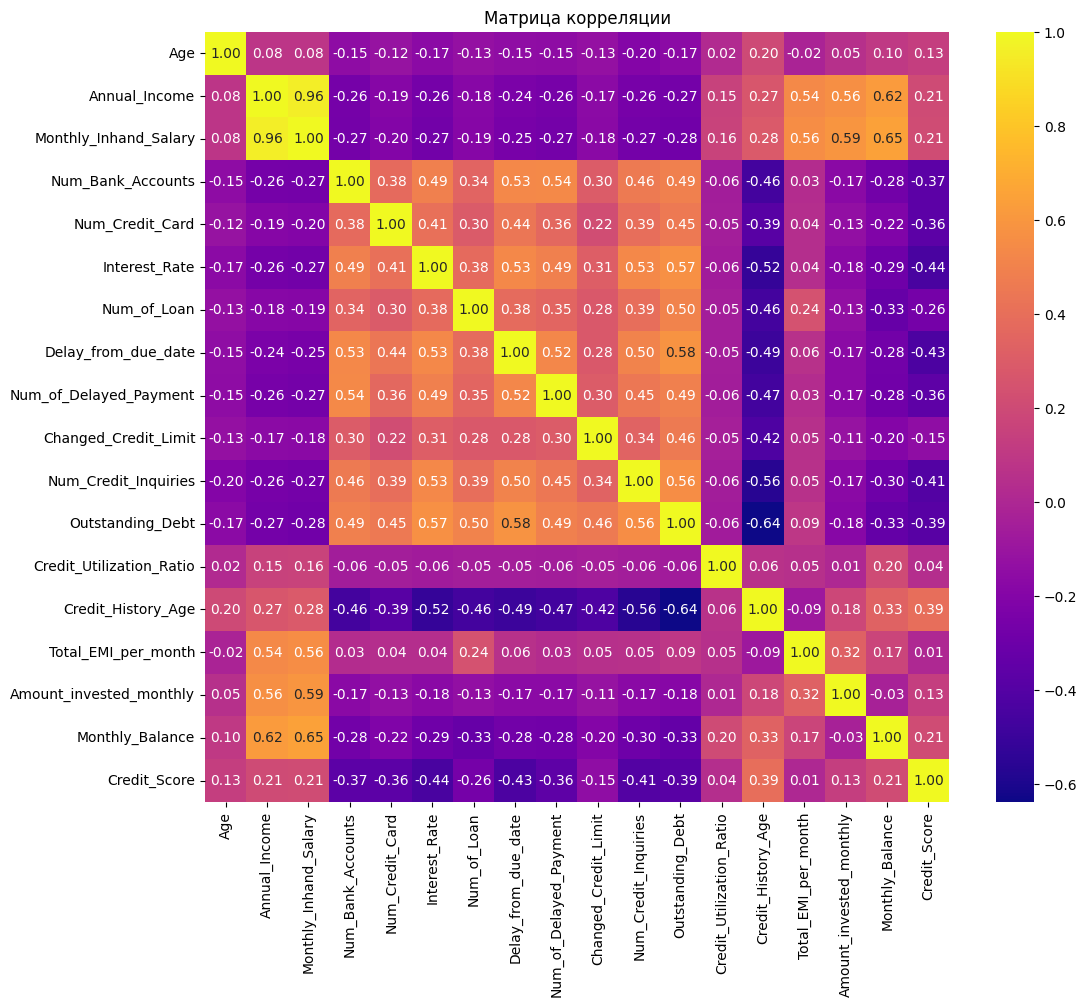

In [618]:
plt.figure(figsize=(12, 10))
corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="plasma")
plt.title("Матрица корреляции")
plt.show()

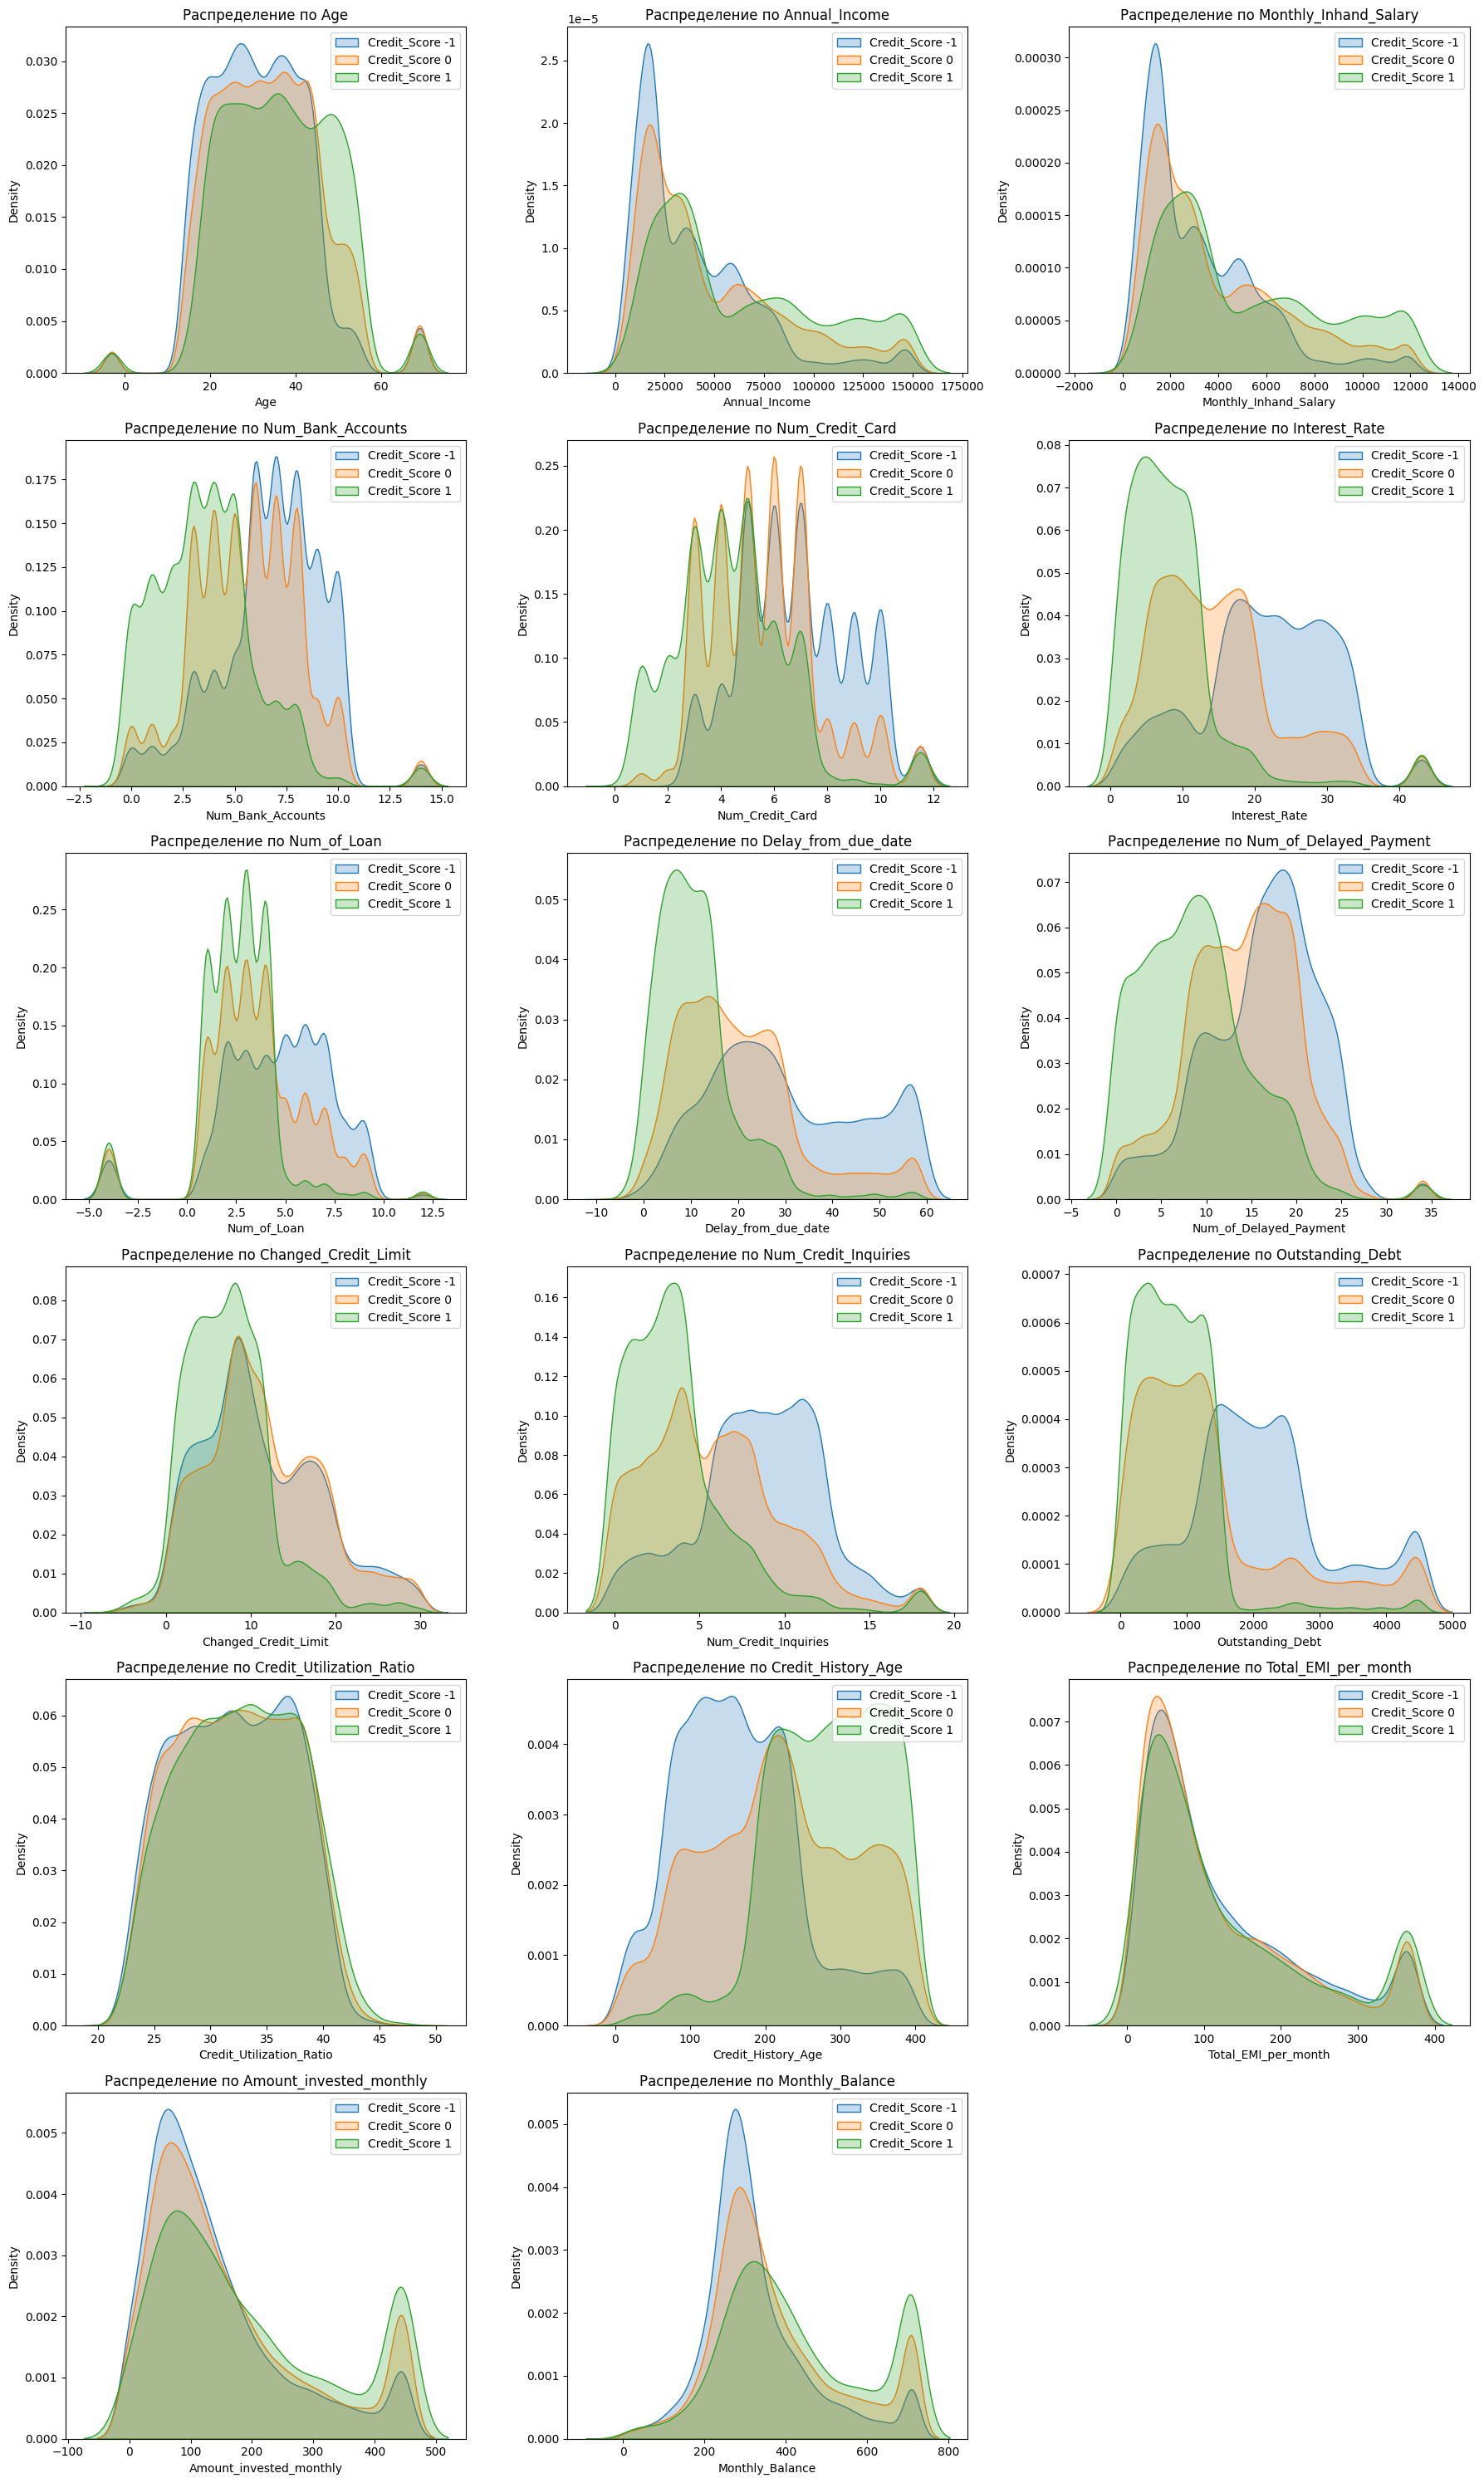

In [619]:
features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

ncols = 3
nrows = int(np.ceil(len(features) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 5))
axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]
    for score in sorted(data['Credit_Score'].unique()):
        subset = data[data['Credit_Score'] == score]
        sns.kdeplot(data=subset, x=col, label=f'Credit_Score {score}', fill=True, ax=ax)
    ax.set_title(f'Распределение по {col}')
    ax.set_xlabel(col)
    ax.legend()
    
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Теперь обратим внимание на признаки `Type_of_Loan`, `Occupation`, `Credit_Mix`, `Payment_Behaviour`. Каждое значение в них - какая-то комбинация типов, записанная в виде одной строки. Такое представление малополезно - гораздо логичнее было бы превратить каждый тип в отдельный 0-1 признак.

In [620]:
data.sample(10).T

,1403,78180,77561,62901,93166,13093,92867,68595,97425,6930
Age,24.0,22.0,38.0,18.0,48.0,54.0,14.0,29.0,37.0,36.0
Occupation,Developer,Entrepreneur,Lawyer,Developer,Musician,Developer,Teacher,Entrepreneur,Scientist,_______
Annual_Income,28230.92,22320.325,18221.965,63402.2,67481.24,10563.445,30624.62,30652.38,10127.625,68173.92
Monthly_Inhand_Salary,2184.576667,1966.027083,1247.497083,5475.516667,5446.436667,751.287083,2319.051667,2836.365,872.96875,5948.16
Num_Bank_Accounts,8.0,0.0,3.0,5.0,8.0,7.0,7.0,3.0,10.0,6.0
Num_Credit_Card,6.0,7.0,7.0,3.0,3.0,5.0,7.0,7.0,8.0,10.0
Interest_Rate,32.0,9.0,17.0,18.0,19.0,12.0,11.0,7.0,32.0,32.0
Num_of_Loan,7.0,-4.0,3.0,4.0,1.0,1.0,6.0,4.0,8.0,5.0
Type_of_Loan,Personal Home Equity Credit-Builder Home Equi...,Student Auto Mortgage,Student Debt Consolidation Personal,Mortgage Student Credit-Builder Home Equity,Debt Consolidation,Debt Consolidation,Auto Payday Personal Personal Student,Mortgage Debt Consolidation Debt Consolidation,Credit-Builder Student Auto Auto Mortgage Home...,Credit-Builder Credit-Builder Payday Mortgage ...
Delay_from_due_date,49.0,25.0,15.0,20.0,11.0,16.0,7.0,10.0,27.0,33.0


In [621]:
def create_dummies_for_columns(df: pd.DataFrame, columns: list[str]) -> pd.DataFrame:
    for col in columns:
        dummies = df[col].str.get_dummies(sep=' ')
        dummies = dummies.add_prefix(f"{col}_")
        df = pd.concat([df, dummies], axis=1)
        df.drop(columns=[col], inplace=True)
    return df

In [622]:
cols_to_dummy = ['Type_of_Loan', 'Occupation', 'Credit_Mix', 'Payment_Behaviour']
data = create_dummies_for_columns(data, cols_to_dummy)

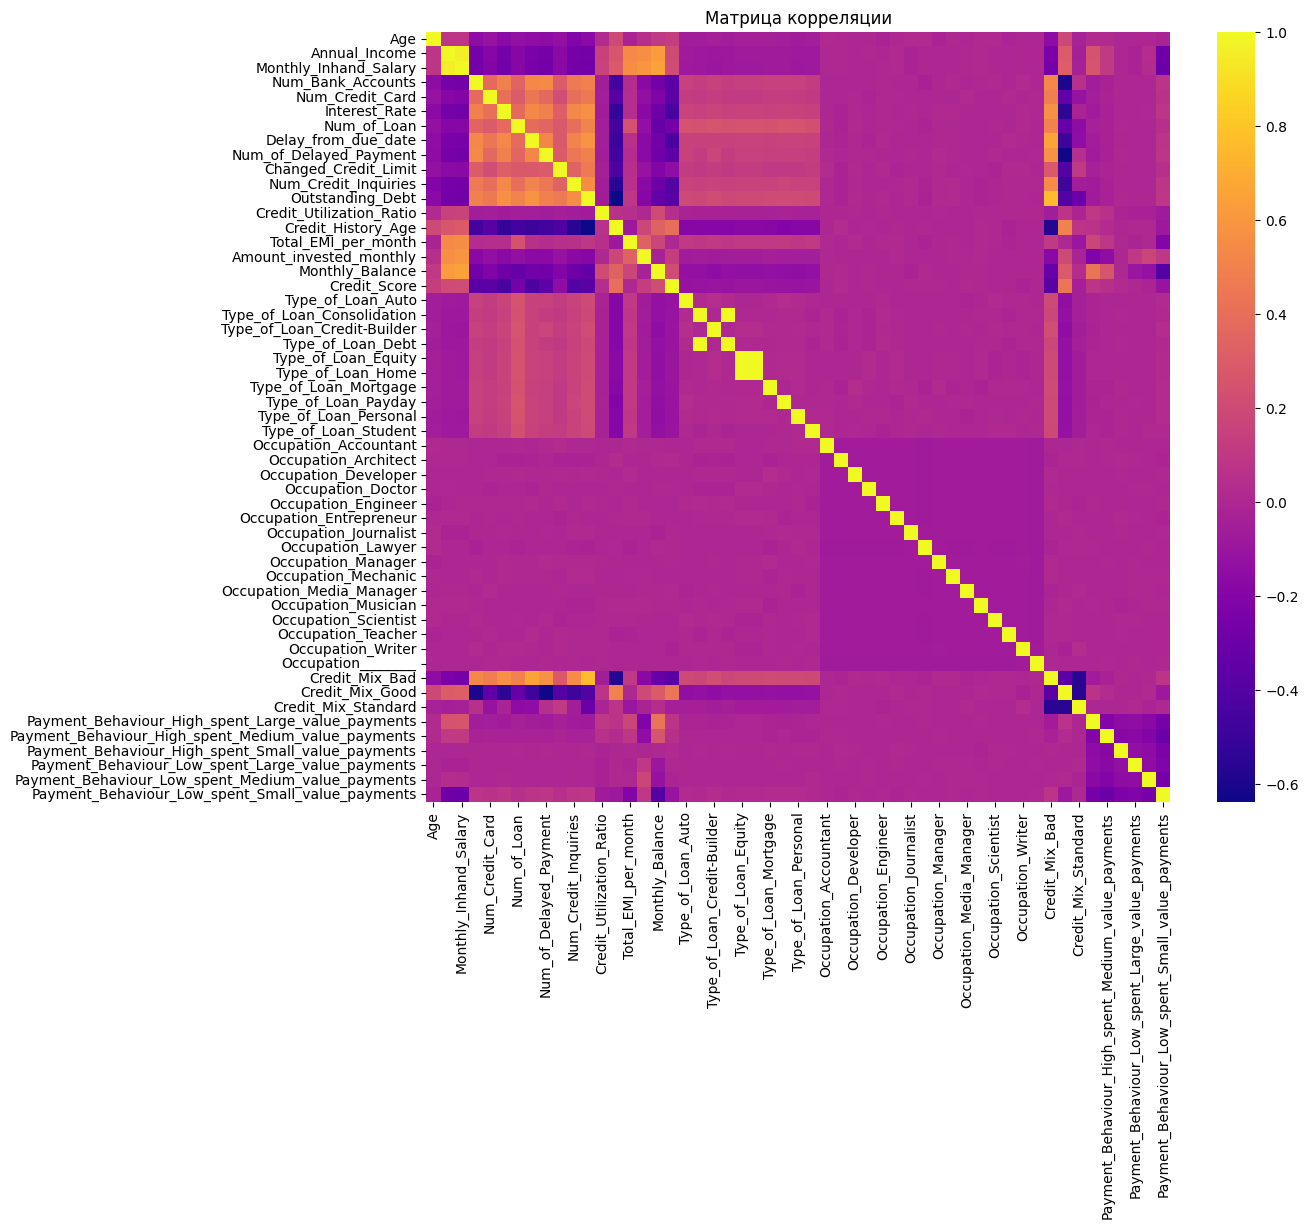

In [623]:
plt.figure(figsize=(12, 10))
corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=False, cmap="plasma")
plt.title("Матрица корреляции")
plt.show()

## Моделирование

Данные готовы, можно приступать к моделированию.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from XGBoost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


ModuleNotFoundError: No module named 'XGBoost'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Credit_Score']), data['Credit_Score'], test_size=0.2, random_state=42)